**EXPLORATION DATASET **

In [ ]:
from scipy.io import arff
import pandas as pd

# Chargement dufichier ARFF
data = arff.loadarff('phpMawTba.arff')

# Conversion des données en DataFrame pandas
adult_census = pd.DataFrame(data[0])

# Affichage du DataFrame
print(adult_census.head())

    age     workclass    fnlwgt        education  education-num  \
0  25.0    b'Private'  226802.0          b'11th'            7.0   
1  38.0    b'Private'   89814.0       b'HS-grad'            9.0   
2  28.0  b'Local-gov'  336951.0    b'Assoc-acdm'           12.0   
3  44.0    b'Private'  160323.0  b'Some-college'           10.0   
4  18.0          b'?'  103497.0  b'Some-college'           10.0   

          marital-status            occupation  relationship      race  \
0       b'Never-married'  b'Machine-op-inspct'  b'Own-child'  b'Black'   
1  b'Married-civ-spouse'    b'Farming-fishing'    b'Husband'  b'White'   
2  b'Married-civ-spouse'    b'Protective-serv'    b'Husband'  b'White'   
3  b'Married-civ-spouse'  b'Machine-op-inspct'    b'Husband'  b'Black'   
4       b'Never-married'                  b'?'  b'Own-child'  b'White'   

         sex  capital-gain  capital-loss  hours-per-week    native-country  \
0    b'Male'           0.0           0.0            40.0  b'United-States'

In [ ]:
#Notre target :
target_column = "class"
#Nombre d'occurence pour chaque valeur low_revenue (<=50k)/ high_revenue(>50k)
adult_census[target_column].value_counts()

b'<=50K'    37155
b'>50K'     11687
Name: class, dtype: int64

Remarquons un déséquilibre des classes.

In [ ]:
#Séparation des valeurs numériques et catégorielles :
numerical_columns = [
    "age",
    "education-num",
    "capital-gain",
    "capital-loss",
    "hours-per-week",
]
categorical_columns = [
    "workclass",
    "education",
    "marital-status",
    "occupation",
    "relationship",
    "race",
    "sex",
    "native-country",
]
all_columns = numerical_columns + categorical_columns + [target_column]

adult_census = adult_census[all_columns]

In [ ]:
#Nombre d'échantillon et nombre de colonnes disponibles dans l'ensemble des données :
print(
    f"The dataset contains {adult_census.shape[0]} samples and "
    f"{adult_census.shape[1]} columns"
)

The dataset contains 48842 samples and 14 columns


In [ ]:
#Nombre d'entité hors colonne cible :
print(f"The dataset contains {adult_census.shape[1] - 1} features.")

The dataset contains 13 features.


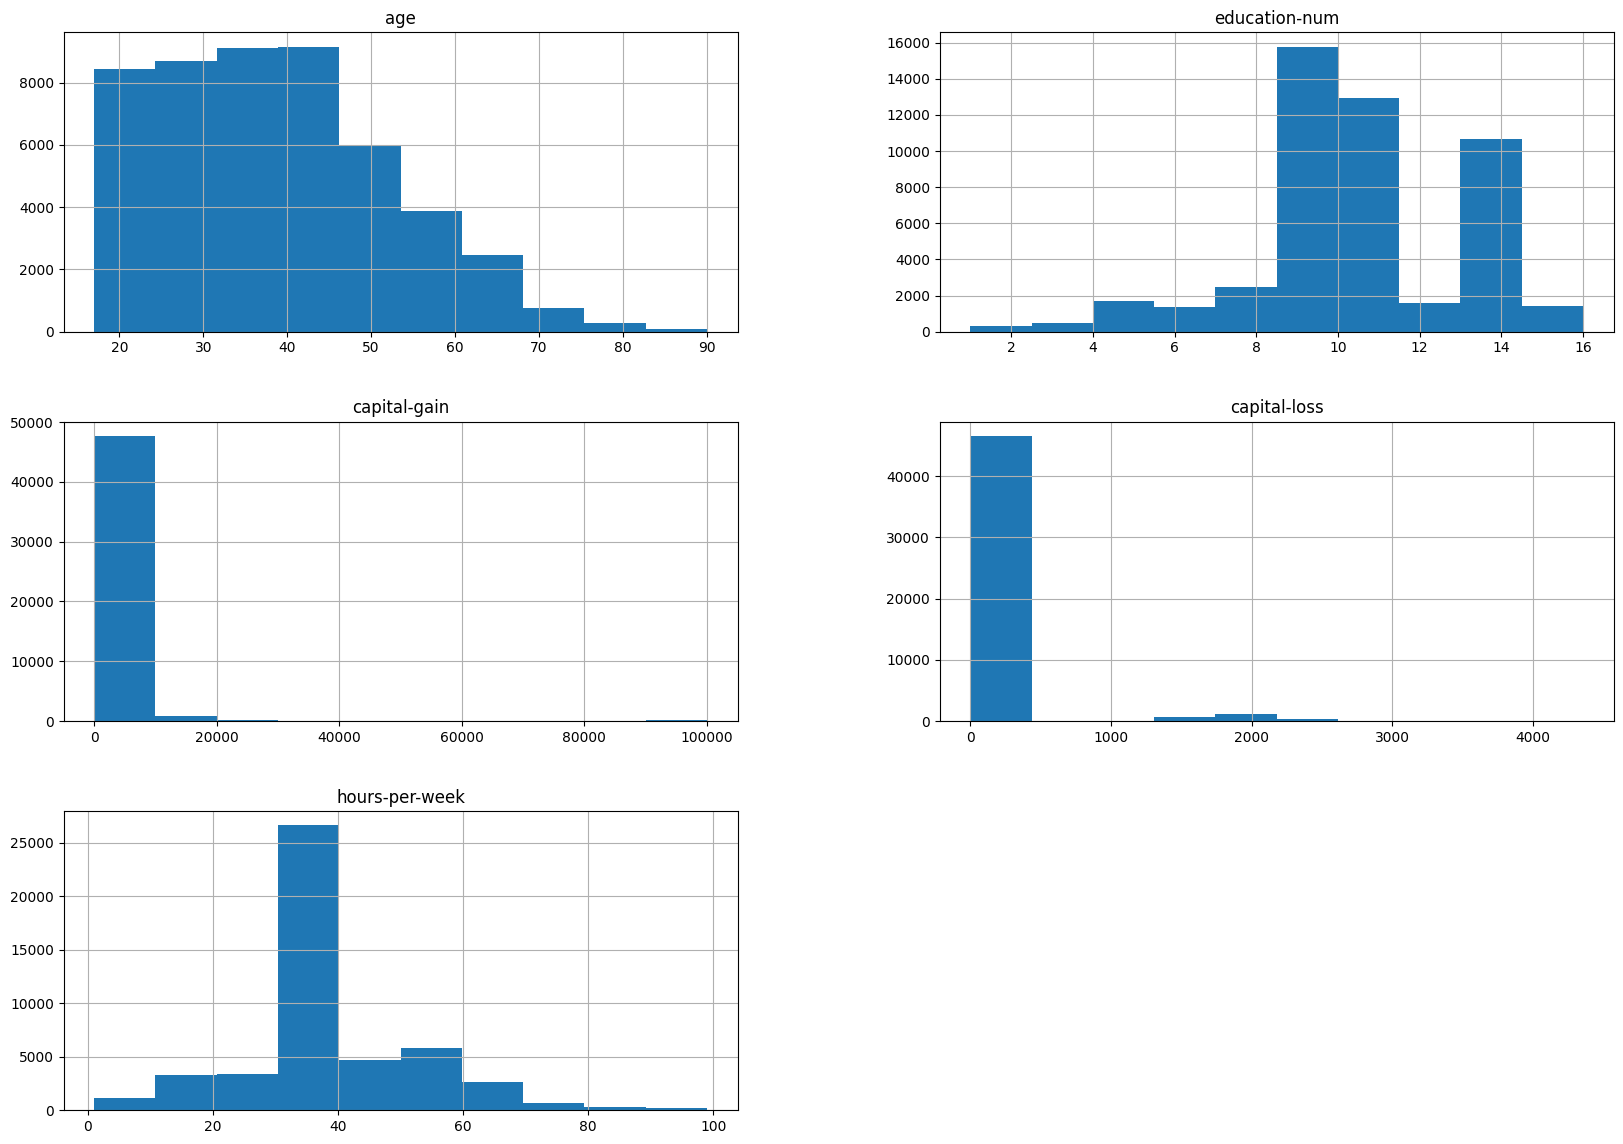

In [ ]:
#Distribution des features numériques:
_ = adult_census.hist(figsize=(20, 14))

In [ ]:
#Distribution valeur catégorielle :
adult_census["sex"].value_counts()
#Déséquilibre important etre échantillons homme/femme (du au processus recueil de données)

b'Male'      32650
b'Female'    16192
Name: sex, dtype: int64

Se référer dans ce cas : fairlearn.org pour obtenir des ressources sur la manière de quantifier et atténuer les problèmes d'équité

In [ ]:
adult_census["education"].value_counts()

b'HS-grad'         15784
b'Some-college'    10878
b'Bachelors'        8025
b'Masters'          2657
b'Assoc-voc'        2061
b'11th'             1812
b'Assoc-acdm'       1601
b'10th'             1389
b'7th-8th'           955
b'Prof-school'       834
b'9th'               756
b'12th'              657
b'Doctorate'         594
b'5th-6th'           509
b'1st-4th'           247
b'Preschool'          83
Name: education, dtype: int64

In [ ]:
#On observe deux pics autour de 10 et 13 pour la variable "education_num", voyons la relation entre les variables "eduction" et "education_num":
pd.crosstab(
    index=adult_census["education"], columns=adult_census["education-num"]
)
#"education" et "education-num"  donnent les mêmes informations

education-num,1.0,2.0,3.0,4.0,5.0,6.0,7.0,8.0,9.0,10.0,11.0,12.0,13.0,14.0,15.0,16.0
education,,,,,,,,,,,,,,,,
b'10th',0,0,0,0,0,1389,0,0,0,0,0,0,0,0,0,0
b'11th',0,0,0,0,0,0,1812,0,0,0,0,0,0,0,0,0
b'12th',0,0,0,0,0,0,0,657,0,0,0,0,0,0,0,0
b'1st-4th',0,247,0,0,0,0,0,0,0,0,0,0,0,0,0,0
b'5th-6th',0,0,509,0,0,0,0,0,0,0,0,0,0,0,0,0
b'7th-8th',0,0,0,955,0,0,0,0,0,0,0,0,0,0,0,0
b'9th',0,0,0,0,756,0,0,0,0,0,0,0,0,0,0,0
b'Assoc-acdm',0,0,0,0,0,0,0,0,0,0,0,1601,0,0,0,0
b'Assoc-voc',0,0,0,0,0,0,0,0,0,0,2061,0,0,0,0,0


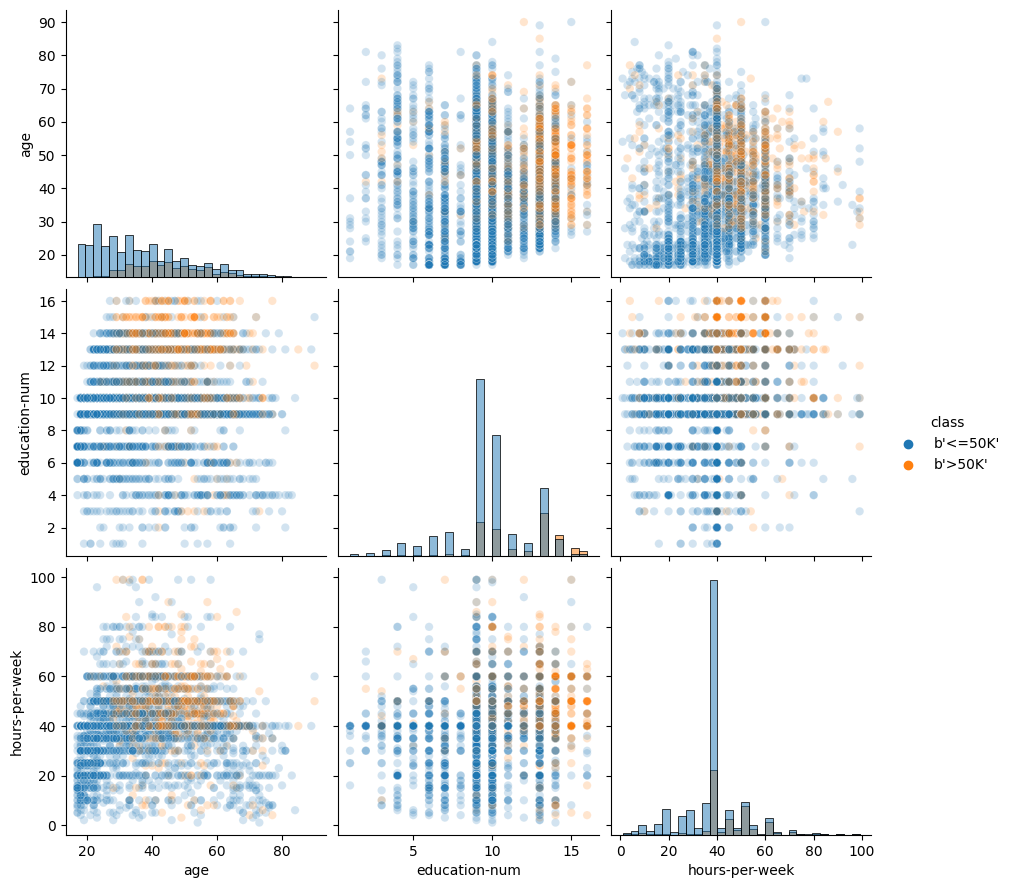

In [ ]:
#pairplot pour montrer comment chaque variable diffère en fonction de notre cible:
import seaborn as sns
n_samples_to_plot = 5000
columns = ["age", "education-num", "hours-per-week"]
_ = sns.pairplot(
    data=adult_census[:n_samples_to_plot],
    vars=columns,
    hue=target_column,
    plot_kws={"alpha": 0.2},
    height=3,
    diag_kind="hist",
    diag_kws={"bins": 30},
)

Les tracés le long de la diagonale montrent la distribution des variables individuelles pour chaque « classe ». Les tracés hors diagonale peuvent révéler des interactions intéressantes entre les variables

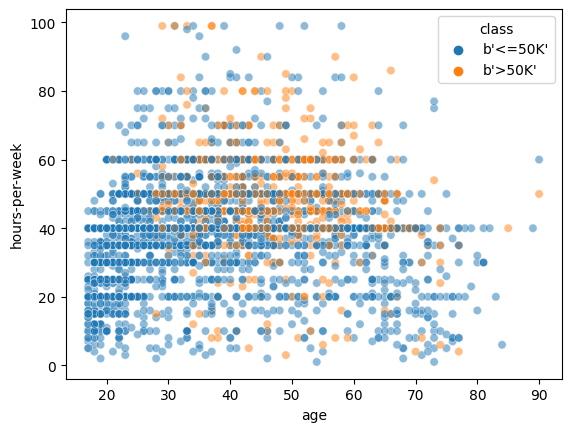

In [ ]:
#concentration surla combinaison des fonctionnalités  "heures par semaine" et "âge"
_ = sns.scatterplot(
    x="age",
    y="hours-per-week",
    data=adult_census[:n_samples_to_plot],
    hue=target_column,
    alpha=0.5,
)

Les points bleus signifient un faible revenu et les points orange un revenu élevé. Cette partie du tracé est la même que le tracé en bas à gauche du diagramme en paires ci-dessus.

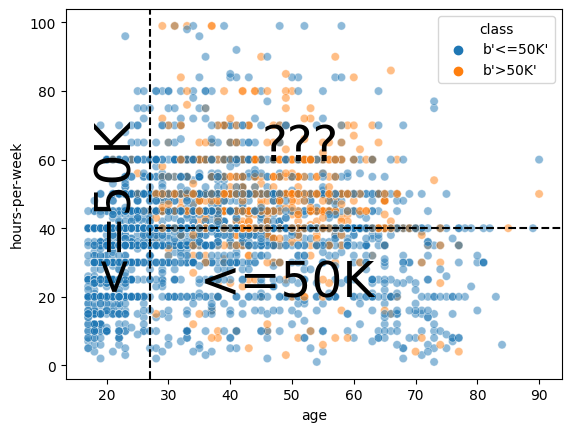

In [ ]:
import matplotlib.pyplot as plt

ax = sns.scatterplot(
    x="age",
    y="hours-per-week",
    data=adult_census[:n_samples_to_plot],
    hue=target_column,
    alpha=0.5,
)

age_limit = 27
plt.axvline(x=age_limit, ymin=0, ymax=1, color="black", linestyle="--")

hours_per_week_limit = 40
plt.axhline(
    y=hours_per_week_limit, xmin=0.18, xmax=1, color="black", linestyle="--"
)

plt.annotate("<=50K", (17, 25), rotation=90, fontsize=35)
plt.annotate("<=50K", (35, 20), fontsize=35)
_ = plt.annotate("???", (45, 60), fontsize=35)

Dans ce graphique, nous pouvons essayer de trouver des régions qui contiennent principalement une seule classe, de sorte que nous puissions facilement décider quelle classe prédire

Dans la région < 27 ans (région de gauche), la prévision est un faible revenu. En effet, il y a beaucoup de points bleus et on ne voit aucun point orange.
Dans la région d'âge > 27 ET heures par semaine < 40 (région en bas à droite), la prévision est un faible revenu. En effet, on y retrouve de nombreux points bleus et seulement quelques points oranges.
Dans la région âge > 27 ET heures par semaine > 40 (région en haut à droite), nous voyons un mélange de points bleus et de points orange. Il semble compliqué de choisir quelle classe prédire dans cette région.

Pour résumer, la chose importante à retenir est que dans un contexte de machine learning, un modèle crée automatiquement les « règles » à partir des données existantes afin de faire des prédictions sur de nouvelles données invisibles.


**MODELE PREDICTIF AVEC LES DONNEES NUMERIQUES **

In [ ]:
#Séparation de la variable cible du reste des données :
target_name = "class"
target = adult_census[target_name]

# méthode replace pour convertir les étiquettes
target.replace({b'<=50K': 0, b'>50K': 1}, inplace=True)
print(target.head())

0    0
1    0
2    1
3    1
4    0
Name: class, dtype: int64


In [ ]:
data = adult_census.drop(columns=[target_name])
data.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country
0,25.0,b'Private',226802.0,b'11th',7.0,b'Never-married',b'Machine-op-inspct',b'Own-child',b'Black',b'Male',0.0,0.0,40.0,b'United-States'
1,38.0,b'Private',89814.0,b'HS-grad',9.0,b'Married-civ-spouse',b'Farming-fishing',b'Husband',b'White',b'Male',0.0,0.0,50.0,b'United-States'
2,28.0,b'Local-gov',336951.0,b'Assoc-acdm',12.0,b'Married-civ-spouse',b'Protective-serv',b'Husband',b'White',b'Male',0.0,0.0,40.0,b'United-States'
3,44.0,b'Private',160323.0,b'Some-college',10.0,b'Married-civ-spouse',b'Machine-op-inspct',b'Husband',b'Black',b'Male',7688.0,0.0,40.0,b'United-States'
4,18.0,b'?',103497.0,b'Some-college',10.0,b'Never-married',b'?',b'Own-child',b'White',b'Female',0.0,0.0,30.0,b'United-States'


In [ ]:
#Ne garder que les colonnes numériques
numerical_columns = [
    "age",
    "education-num",
    "capital-gain",
    "capital-loss",
    "hours-per-week",
]
data=data[numerical_columns]
data

,age,education-num,capital-gain,capital-loss,hours-per-week
0,25.0,7.0,0.0,0.0,40.0
1,38.0,9.0,0.0,0.0,50.0
2,28.0,12.0,0.0,0.0,40.0
3,44.0,10.0,7688.0,0.0,40.0
4,18.0,10.0,0.0,0.0,30.0
...,...,...,...,...,...
48837,27.0,12.0,0.0,0.0,38.0
48838,40.0,9.0,0.0,0.0,40.0
48839,58.0,9.0,0.0,0.0,40.0
48840,22.0,9.0,0.0,0.0,20.0


In [ ]:
#échantillons disponibles dans notre ensemble de données :
data.columns
print(
    f"The dataset contains {data.shape[0]} samples and "
    f"{data.shape[1]} features"
)

The dataset contains 48842 samples and 5 features


*KNEIGHBORSCLASSIFIER- K LES PLUS PROCHES VOISINS .**

In [ ]:
#Choix ici d'utiliser l'algorithme intuitif : K plus proches voisins.
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split


X_train, X_test, y_train, y_test = train_test_split(data, target, test_size=0.2, random_state=42)


knn_model = KNeighborsClassifier(n_neighbors=50)
knn_model.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=50)

In [ ]:
#Prédiction
target_predicted = knn_model.predict(X_train)

In [ ]:
#Comparaison des prédictions avec les datas actuelles : target_predicted / y_test
target_predicted[:5]

array([0, 0, 0, 0, 0])

In [ ]:
y_test[:5]

7762     0
23881    0
30507    1
28911    0
19484    0
Name: class, dtype: int64

In [ ]:
target_predicted[:5]==y_test[:5]
print(
    "Number of correct prediction: "
    f"{(y_test[:5] == target_predicted[:5]).sum()} / 5"
)

Number of correct prediction: 4 / 5


In [ ]:
accuracy = knn_model.score(X_train, y_train)
accuracy

0.8412714662298774

Notre modèle k-NN a correctement prédit les étiquettes pour environ 84,8 % des échantillons dans l'ensemble de test.
Avec n_neighbors=3 : Notre modèle K-NN prédit correctement environ 84,5% des échantillons dans l'ensembe de test.
Avec n_neighbors =50: Notre modèle K-NN prédit correctement environ 84 % des échantillons dans l'ensemble de test .

Le choix du nombre optimal de voisins dépend de la nature spécifique des données. Si les données sont relativement complexes avec des structures locales importantes, un nombre plus faible de voisins peut être préférable. Si les données sont plus lisses et présentent des tendances générales, un nombre plus élevé de voisins peut être approprié.

**LOGISTIC REGRESSION **

Nous reprenons les données numériques pour cette modélisation.

In [ ]:
from sklearn.model_selection import train_test_split


X_train, X_test, y_train, y_test = train_test_split(data, target, test_size=0.2, random_state=42)

In [ ]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression()
model.fit(X_train, y_train)

LogisticRegression()

In [ ]:
accuracy = model.score(X_test, y_test)
print(f"Accuracy of logistic regression: {accuracy:.3f}")

Accuracy of logistic regression: 0.818


Notre modèle a correctement prédit les étiquettes pour 82% des échantillons dans l'ensemble du test.

In [ ]:
from sklearn.dummy import DummyClassifier
from sklearn.metrics import accuracy_score
# Predict pour :' >50K'
dummy_classifier_gt50k = DummyClassifier(strategy="constant", constant=1)
dummy_classifier_gt50k.fit(X_train, y_train)

#Prédiction sur le test set
y_pred_gt50k = dummy_classifier_gt50k.predict(X_test)

# accuracy
accuracy_gt50k = accuracy_score(y_test, y_pred_gt50k)
print(f"Accuracy when always predicting ' >50K': {accuracy_gt50k}")

# Predict pour ' <=50K'
dummy_classifier_lte50k = DummyClassifier(strategy="constant", constant=0)
dummy_classifier_lte50k.fit(X_train, y_train)

# Prediction sur le test set
y_pred_lte50k = dummy_classifier_lte50k.predict(X_test)

# accuracy
accuracy_lte50k = accuracy_score(y_test, y_pred_lte50k)
print(f"Accuracy when always predicting ' <=50K': {accuracy_lte50k}")

Accuracy when always predicting ' >50K': 0.2344149861807759
Accuracy when always predicting ' <=50K': 0.7655850138192241
